In [11]:
#Importing all the libraries we will need.
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew


In [12]:

# Download data for the Euro Stoxx 50 (^STOXX50E) from Yahoo Finance
eurostoxx50_data = yf.download('^STOXX50E', start='1900-01-01')

# Calculate daily returns
eurostoxx50_data['Returns'] = eurostoxx50_data['Adj Close'].pct_change()


[*********************100%***********************]  1 of 1 completed


1. **Prices are non-stationary**:
   - **Formula**: 
     $$ 
     \text{Price}_t = \text{Price}_{t-1} + \epsilon_t 
     $$
   - Prices often exhibit trends over time, which means they do not have a constant mean or variance.






C:\Users\trist\AppData\Local\Temp\ipykernel_4220\3307857124.py:8: FutureWarning: The behavior of .astype from datetime64[ns] to int32 is deprecated. In a future version, this astype will return exactly the specified dtype instead of int64, and will raise if that conversion overflows.
  z = np.polyfit(eurostoxx50_data.index.astype(int), eurostoxx50_data['Adj Close'], 1)
C:\Users\trist\AppData\Local\Temp\ipykernel_4220\3307857124.py:10: FutureWarning: The behavior of .astype from datetime64[ns] to int32 is deprecated. In a future version, this astype will return exactly the specified dtype instead of int64, and will raise if that conversion overflows.
  plt.plot(eurostoxx50_data.index, p(eurostoxx50_data.index.astype(int)), "r--")


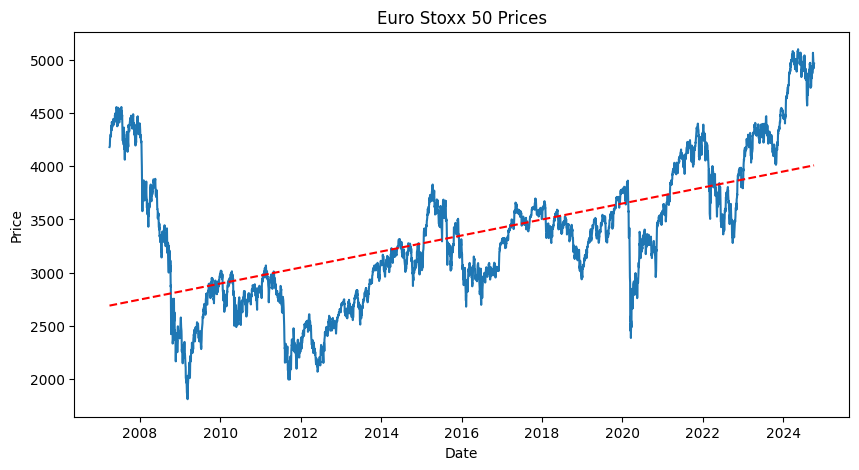

In [22]:

# Plot the price to show non-stationarity
plt.figure(figsize=(10, 5))
plt.plot(eurostoxx50_data['Adj Close'])
plt.title('Euro Stoxx 50 Prices')
plt.xlabel('Date')
plt.ylabel('Price')
# Add a linear trend line to the price plot
z = np.polyfit(eurostoxx50_data.index.astype(int), eurostoxx50_data['Adj Close'], 1)
p = np.poly1d(z)
plt.plot(eurostoxx50_data.index, p(eurostoxx50_data.index.astype(int)), "r--")
plt.show()



**Returns are stationary**:
   - **Formula**: 
     $$ 
     \text{Return}_t = \frac{\text{Price}_t - \text{Price}_{t-1}}{\text{Price}_{t-1}} = \frac{\text{Price}_t}{\text{Price}_{t-1}} - 1
     $$
   - Returns usually have a stable mean and variance, indicating they are stationary.

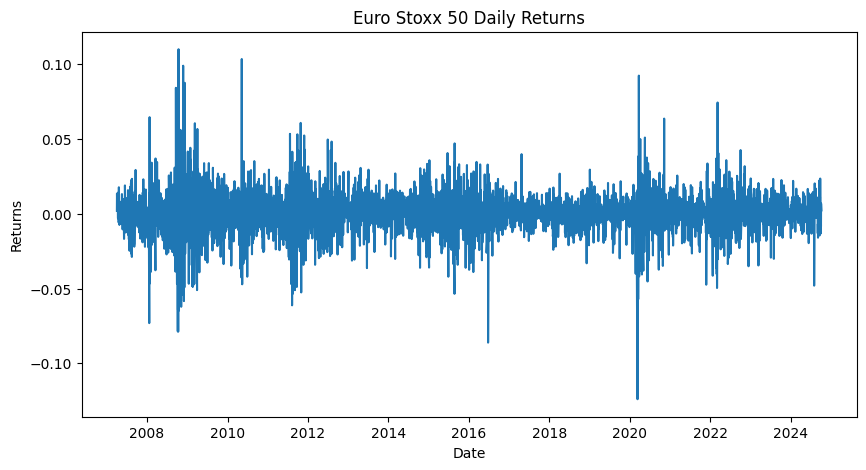

In [14]:

# Plot the returns to show stationarity
plt.figure(figsize=(10, 5))
plt.plot(eurostoxx50_data['Returns'])
plt.title('Euro Stoxx 50 Daily Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()


**Returns are asymmetric (negative skewness)**:
   - **Skewness formula**: Third standardized moment of the distribution.
     $$ 
     \text{Skewness} = \frac{E[(X - \mu)^3]}{\sigma^3} 
     $$
   - Negative skewness indicates the presence of more extreme negative returns.

In [15]:

# Check for asymmetry (negative skewness)
print(f"Skewness of Returns: {skew(eurostoxx50_data['Returns'].dropna())}")


Skewness of Returns: -0.1007442455163168


6. **Returns have heavy tails (excess kurtosis)**:
   - **Kurtosis formula**: Fourth standardized moment of the distribution.
     $$ 
     \text{Kurtosis} = \frac{E[(X - \mu)^4]}{\sigma^4} - 3 
     $$
   - A higher kurtosis value suggests a higher probability of extreme returns (fat tails).


In [16]:

# Check for heavy tails (excess kurtosis)
print(f"Kurtosis of Returns: {kurtosis(eurostoxx50_data['Returns'].dropna())}")


Kurtosis of Returns: 7.506155077836542


5. **Aggregational Gaussianity**:
   - As the time interval increases (e.g., from daily to weekly), returns tend to follow a Gaussian (normal) distribution more closely.


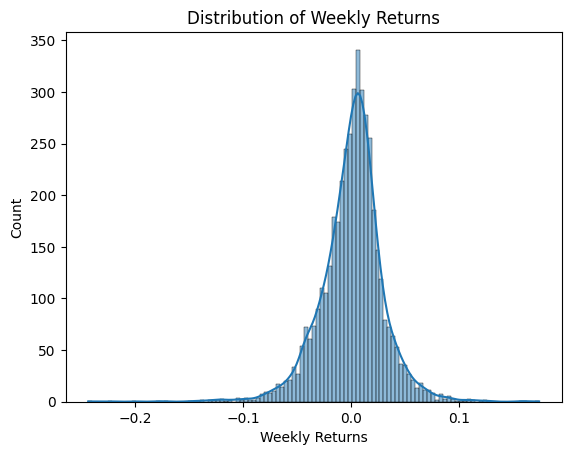

In [17]:

# Aggregational Gaussianity - Plot distribution of returns at different frequencies
eurostoxx50_data['Weekly Returns'] = eurostoxx50_data['Adj Close'].pct_change(5)
sns.histplot(eurostoxx50_data['Weekly Returns'].dropna(), kde=True)
plt.title('Distribution of Weekly Returns')
plt.show()


6. **Returns are not autocorrelated**:
   - **Autocorrelation formula**: 
     $$ 
     \rho(k) = \frac{E[(X_t - \mu)(X_{t-k} - \mu)]}{\sigma^2} 
     $$
   - In efficient markets, autocorrelation of returns should be near zero.

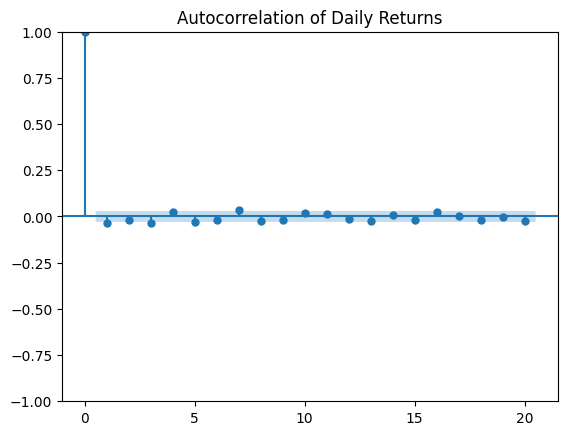

In [18]:

# Check for autocorrelation in returns
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(eurostoxx50_data['Returns'].dropna(), lags=20)
plt.title('Autocorrelation of Daily Returns')
plt.show()


7. **Volatility clustering**:
   - Volatility tends to cluster, meaning that periods of high volatility are followed by high volatility.
   - Observed using the autocorrelation of squared returns.


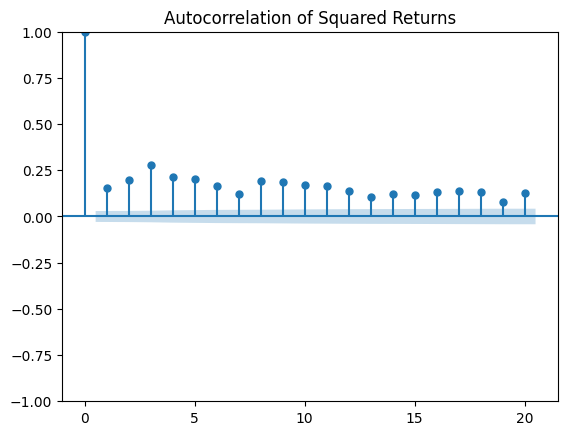

In [19]:

# Check for volatility clustering
eurostoxx50_data['Squared Returns'] = eurostoxx50_data['Returns'] ** 2
plot_acf(eurostoxx50_data['Squared Returns'].dropna(), lags=20)
plt.title('Autocorrelation of Squared Returns')
plt.show()


8. **Leverage effect**:
   - Negative returns are often followed by increased volatility, indicating that leverage can amplify market movements.

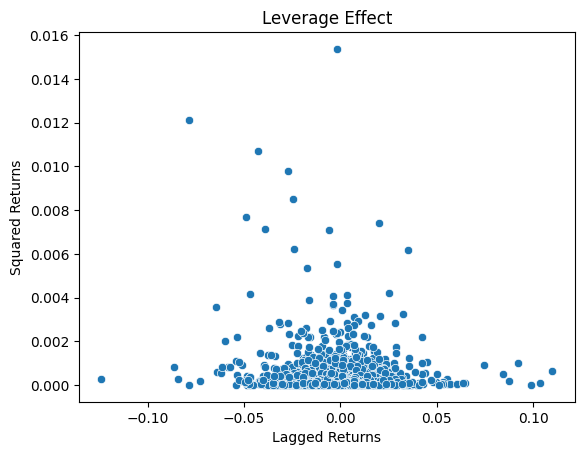

In [20]:

# Visualize Leverage Effect
eurostoxx50_data['Lagged Returns'] = eurostoxx50_data['Returns'].shift(1)
sns.scatterplot(x=eurostoxx50_data['Lagged Returns'], y=eurostoxx50_data['Squared Returns'])
plt.title('Leverage Effect')
plt.xlabel('Lagged Returns')
plt.ylabel('Squared Returns')
plt.show()
